# **Chapter 1: Introduction**

In [2]:
print("===============================================================================================\n")
print("Hello! The following project was conducted to create a Machine Learning classification model ")
print("that helps identifying whether Kepler’s objects of interest are exoplanets or not.")
print("This project is driven by human's pursuit to find a potential future home besides of")
print("Earth as the planet becomes more uninhabitable in the distant future.\n")
print("The dataset is downloaded from Kaggle, which originally sourced from NASA Exoplanet Archive.\n")
print("Throughout this analysis, several models are tested to find the best fitted model. The best")
print("model will then be tuned to reach an even higher accuracy score.\n")
print("===============================================================================================\n")


Hello! The following project was conducted to create a Machine Learning classification model 
that helps identifying whether Kepler’s objects of interest are exoplanets or not.
This project is driven by human's pursuit to find a potential future home besides of
Earth as the planet becomes more uninhabitable in the distant future.

The dataset is downloaded from Kaggle, which originally sourced from NASA Exoplanet Archive.

Throughout this analysis, several models are tested to find the best fitted model. The best
model will then be tuned to reach an even higher accuracy score.




# **Chapter 2: Background**

**Background:**

The search for habitable planets besides our own has captivated humanity for decades. Whether driven 
by curiosity about extraterrestrial life or the need for a potential future home, this pursuit has gained 
urgency as Earth's resources face increasing strain. Climate change, pollution, and resource depletion 
threaten the planet's habitability, while the distant future holds the inevitability of the Sun expanding 
into a red giant, making Earth uninhabitable. NASA’s goal these days is to find unmistakable signs of 
current life outside of Earth. 


Kepler space telescope was launched in 2009 with the purpose of searching for exoplanets, especially 
those in the habitable zone of their stars. The spacecraft, although officially retired in 2018, collected 
an immense amount of data which continues to be analysed to this day. This project focuses on 
classifying Kepler’s objects of interest (KOIs) as either exoplanets, candidate of exoplanets, or false positives caused by phenomena like binary stars or noise.  

**Objective:**

Develop a machine learning classification model to identify whether Kepler’s object of interest is 
exoplanet, candidate of exoplanet, or not.

**User:**

NASA Scientist

# **Chapter 3: Import Libraries**

In [2]:
# Step 1: Import all libraries


## Libraries for data manipulation
import pandas as pd
import numpy as np


## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Libraries for Feature Engineering
import sklearn
from scipy.stats import spearmanr, chi2_contingency

from sklearn.model_selection import train_test_split
# Used to divide train and test

from sklearn.linear_model import LogisticRegression
# Library to define and create model LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance
# MinMaxScaler: Scales features to a specified range, usually between 0 and 1
# RobustScaler: Scales features using statistics that are robust to outliers (e.g., median and IQR)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
# OneHotEncoder: Converts categorical variables into binary (one-hot) encoded format
# LabelEncoder: Encodes target labels with values between 0 and n_classes-1, best for tree-based model
# OrdinalEncoder: Encodes target with hierachichal values

from sklearn.compose import ColumnTransformer, make_column_selector as selector
# Pipeline helper
# ColumnTransformer: Applies different preprocessing steps to specific columns
# selector: To select specific types of columns (e.g., numerical or categorical)

from sklearn.pipeline import Pipeline
# Pipeline: Chains multiple preprocessing steps and a model into a single workflow

from sklearn.neighbors import KNeighborsClassifier
# Pipeline: K-Nearest Neighbors classifier

from sklearn.svm import SVC
# Pipeline: Support Vector Machines

from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier: A tree-based model used for classification tasks

from sklearn.linear_model import LogisticRegression
# LogisticRegression: A linear model used for binary and multiclass classification

from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier: An ensemble learning method that uses multiple decision trees to improve classification performance

from xgboost import XGBClassifier
# XGBClassifier: An ensemble learning method that focusing on correcting the errors of previous ones

from sklearn.model_selection import GridSearchCV
# GridSearchCV: Automates hyperparameter tuning by exhaustively tries every combination of hyperparameters from a grid

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, make_scorer
# classification_report: Summarizes precision, recall, F1-score, and support for each class
# accuracy_score: Measures the proportion of correctly predicted samples
# confusion_matrix: Creates a table to show actual vs predicted class counts
# roc_auc_score: Computes the area under the ROC curve
# f1_score: Balances precision and recall by calculating their harmonic mean

from imblearn.pipeline import Pipeline
# pipeline for imbalance

from imblearn.over_sampling import SMOTE, SMOTENC
# handle imbalance of train data


## Libraries for model evaluation and validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
# cross_val_score: Evaluates a model using cross-validation (folds)
# StratifiedKFold: Ensures that each fold in cross-validation contains a proportional representation of each class
# learning_curve: Generates data to plot a learning curve, which shows how the model's performance changes as the training dataset size increases

from sklearn.utils import shuffle
# shuffle: Randomizes the order of data to reduce bias during training


## Library to save model
import pickle


# **Chapter 4: Data Loading & Data Wrangling**

## **4.1. Data Loading**

In [3]:
# Step 1: Read the dataset
pd.set_option('display.max_columns', 50)
df_original = pd.read_csv('cumulative.csv')
df_original.head(10)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,4.59450,0.06100,-0.06100,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,NaN,NaN,114.81,112.85,-36.70,66.5,1.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,NaN,NaN,427.65,420.33,-136.70,40.2,2.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,-0.004610,0.755,0.212,-0.523,2.42900,0.16500,-0.16500,226.5,16.8,-16.8,1.59,0.52,-0.17,1360.0,NaN,NaN,807.74,793.91,-258.20,15.0,3.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,-0.002530,1.169,7.133,-0.044,5.02200,0.13600,-0.13600,233.7,5.8,-5.8,39.21,6.45,-9.67,1342.0,NaN,NaN,767.22,349.28,-365.49,47.7,1.0,q1_q17_dr25_tce,6227.0,111.0,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.62193

In [4]:
# Step 2: Check dataset general information
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

## **4.2. Unnecessary Columns Removal**

Understanding the nature or metadata of the dataset can be done by exploring the following link:

https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

Based on the information from the NASA Exoplanet Archive, we conclude that the columns 'kepid', 'rowid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_teq_err1', and 'koi_teq_err2' are unnecessary for our analysis. For example, the 'kepid' column serves only as a target identification number and does not provide meaningful information for the machine learning model. Additionally, the columns 'koi_teq_err1' and 'koi_teq_err2' contain no values in any rows, making them irrelevant for further processing.

Therefore, these series need to be removed.

In [5]:
# Step 1: Drop unuseful columns
df_original = df_original.drop(['kepid', 'rowid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_teq_err1', 'koi_teq_err2'], axis = 1)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_fpflag_nt      9564 non-null   int64  
 2   koi_fpflag_ss      9564 non-null   int64  
 3   koi_fpflag_co      9564 non-null   int64  
 4   koi_fpflag_ec      9564 non-null   int64  
 5   koi_period         9564 non-null   float64
 6   koi_period_err1    9110 non-null   float64
 7   koi_period_err2    9110 non-null   float64
 8   koi_time0bk        9564 non-null   float64
 9   koi_time0bk_err1   9110 non-null   float64
 10  koi_time0bk_err2   9110 non-null   float64
 11  koi_impact         9201 non-null   float64
 12  koi_impact_err1    9110 non-null   float64
 13  koi_impact_err2    9110 non-null   float64
 14  koi_duration       9564 non-null   float64
 15  koi_duration_err1  9110 non-null   float64
 16  koi_duration_err2  9110 

# **Chapter 5: Exploratory Data Analysis**

To get insights into the characteristics and trends of our dataset, we will perform statistical analysis, create visualizations, and generally explore the data . However, before plotting, we will make a copy of our DataFrame specifically for EDA and Feature Engineering. This step is crucial to avoid data leakage.

In [6]:
# Step 1: Create a copy of our dataframe
df = df_original.copy()

## **5.1. Distribution of KOI Dispositions**

A confirmed exoplanet is a celestial body that has been verified as a planet through multiple independent methods or observations. Meanwhile, a candidate exoplanet simply means that the exoplanet that shows characteristics consistent with being a planet but has not yet been fully verified. 

Kepler also sometimes identify a celestial object to be exoplanets incorrectly. This is called False Positive.

This section will answer how many, in percentage, confirmed and candidate exoplanets were found by Kepler space tellescope.

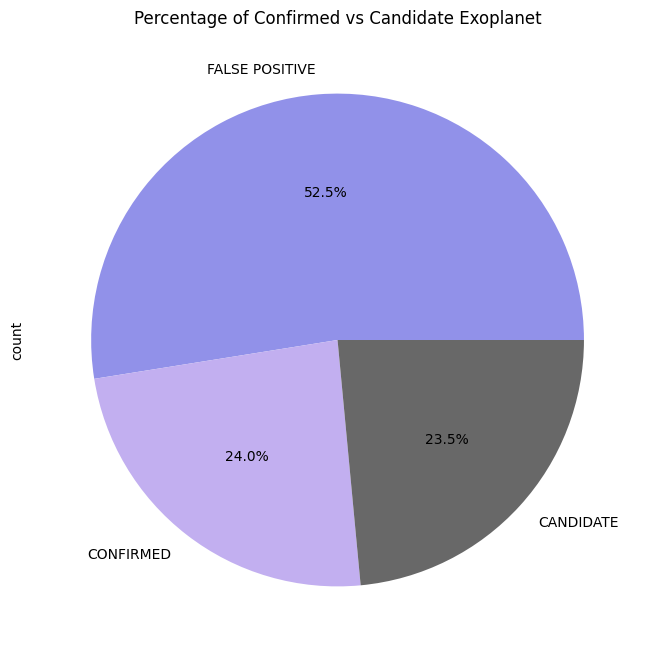

In [7]:
# Step 1: Create a figure and axis for the plot with figure size of 8x8 inches
fig,ax1 = plt.subplots(figsize=(8,8))

# Step 2: Plot a pie chart of the 'X' column's value counts
# 'autopct' displays percentages with only one decimal places
# 'ax=ax1' means that the plot will be drawn on the created axis
df['koi_disposition'].value_counts().plot(kind='pie',
                                                     autopct='%.1f%%',
                                                     ax=ax1,
                                                     colors=['#9191E9', '#C2AFF0', '#686868', '#457EAC'],
                                                     title="Percentage of Confirmed vs Candidate Exoplanet")

# Step 3: Show the plot
plt.show()

**Insight:**

As presented above, half of KOIs are determined to be False Positive, or what detected as exoplanet but after further analysis id not factually correct. 52,5% of KOIs are confirmed to incorrectly classified, while 24,0% of KOIs are confirmed to be exoplanet. The remaining 23,5% of candidate exoplanets need to be examined and analyzed further to determine its disposition.

## **5.2. Exoplanets Size Distribution**

The size of all confirmed exoplanets vary, to the ones that have similar radius to Earth or a huge exoplanet like that is of Jupiter. This section will try to answer the question: "How many confirmed exoplanets are Earth-sized, super-Earths, mini-neptune, or gas giants?"

In [8]:
# Step 1: Create a filter for Confirmed Exoplanets
df_filtered = df[df['koi_disposition'] == 'CONFIRMED']

# Step 2: Reset Index
df_filtered.reset_index(drop=True, inplace=True)

# Step 3: Retrieve information
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    2293 non-null   object 
 1   koi_fpflag_nt      2293 non-null   int64  
 2   koi_fpflag_ss      2293 non-null   int64  
 3   koi_fpflag_co      2293 non-null   int64  
 4   koi_fpflag_ec      2293 non-null   int64  
 5   koi_period         2293 non-null   float64
 6   koi_period_err1    2292 non-null   float64
 7   koi_period_err2    2292 non-null   float64
 8   koi_time0bk        2293 non-null   float64
 9   koi_time0bk_err1   2292 non-null   float64
 10  koi_time0bk_err2   2292 non-null   float64
 11  koi_impact         2292 non-null   float64
 12  koi_impact_err1    2292 non-null   float64
 13  koi_impact_err2    2292 non-null   float64
 14  koi_duration       2293 non-null   float64
 15  koi_duration_err1  2292 non-null   float64
 16  koi_duration_err2  2292 

In [9]:
# Step 4: Create function to categorize exoplanets
def categorize_planet_radius(radius):
    if 0.8 <= radius <= 1.25:
        return 'Earth-sized'
    elif 1.25 < radius <= 2.0:
        return 'Super-Earth'
    elif 2.0 < radius <= 4.0:
        return 'Mini-Neptune'
    elif radius > 4.0:
        return 'Gas Giant'
    else:
        return 'Unknown'

df_filtered['planet_category'] = df_filtered['koi_prad'].apply(categorize_planet_radius)

C:\Users\T14\AppData\Local\Temp\ipykernel_20248\222984276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['planet_category'] = df_filtered['koi_prad'].apply(categorize_planet_radius)


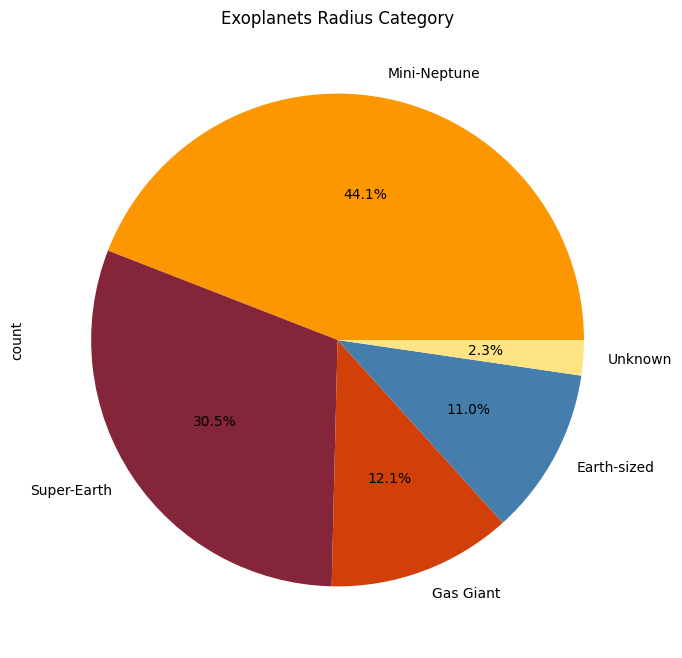

In [10]:
# Step 5: Create a figure and axis for the plot with figure size of 8x8 inches
fig,ax1 = plt.subplots(figsize=(8,8))

# Step 6: Plot a pie chart of the 'X' column's value counts
# 'autopct' displays percentages with only one decimal places
# 'ax=ax1' means that the plot will be drawn on the created axis
df_filtered['planet_category'].value_counts().plot(kind='pie',
                                                     autopct='%.1f%%',
                                                     ax=ax1,
                                                     colors=['#FC9601', '#842539', '#D14009', '#457EAC', '#FFE484'],
                                                     title="Exoplanets Radius Category")

# Step 7: Show the plot
plt.show()

**Insight:**

The majority of confirmed exoplanets (44,1%) found are Mini-Neptune. Mini-Neptunes are planets that are larger than Super-Earths but smaller than Neptune. These planets often have thick atmospheres, primarily composed of hydrogen and helium, and may have a rocky or icy core.

The second majority of exoplanets (30,5%) are Super-Earth. They can have a similar composition (rocky or icy) to Earth, but with a larger mass and potentially a thicker atmosphere.

The exoplanets found equal to the size of Earth is 11%. These exoplanets size may be a good indication that they have similar composition withat that of Earth.

## **5.4. Potential Habitable Exoplanets**

The amount of energy from a star that reaches the surface of a planet or exoplanet (insolation flux) determines how habitable an exoplanet is. If the planet is close to its star, it will benefit from more energy but it will also has a hotter surface, making the planet may be too hot for life. However, if the planet is too far from its star, it will be too cold for form of life to exist.

This analysis answers how many planets fall within their star's habitable zone. The ideal measurement is equal to 1. Insolation Flux = 1 means that the planet is receiving the same amount of energy as Earth does from the Sun. This is often used as a baseline for Earth-like conditions, and it could indicate that the planet is in the habitable zone of its star, similar to Earth.

It's important to note that this analysis uses simplified measure (koi_insol) to determine whether an exoplanet is habitable or not. To fully understand if an exoplanet is habitable or not, there are several factors need to be measured. However, this analysis could serve as a preliminary analysis or assumption.

In [11]:
# Step 1: Create a function to categorize insolation flux
def habitable_category(insolation_flux):
    if insolation_flux == 1:
        return 'Potentially Habitable'
    elif insolation_flux > 1:
        return 'High Energy'
    elif insolation_flux < 1:
        return 'Low Energy'
    else:
        return 'Unknown'

df_filtered['habitable_category'] = df_filtered['koi_insol'].apply(habitable_category)

C:\Users\T14\AppData\Local\Temp\ipykernel_20248\393635035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['habitable_category'] = df_filtered['koi_insol'].apply(habitable_category)


In [12]:
# Step 2: Create a variable for count of category
count_category_influx = df_filtered['habitable_category'].value_counts()

# Step 3: Call the variable
count_category_influx

habitable_category
High Energy    2258
Low Energy       34
Unknown           1
Name: count, dtype: int64

In [13]:
# Step 4: Find the Unknown cause
df_filtered['koi_insol'].isna().sum()

1

<Axes: xlabel='habitable_category'>

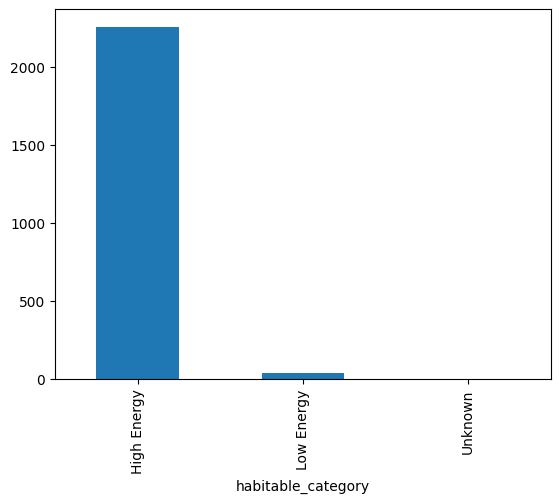

In [14]:
# Step 5: Plot a bar chart to show the result
count_category_influx.plot(kind='bar')

**Insight:**

Out of 2293 confirmed exoplanets, 2258 are found to be in higher energy frequency than Earth. It means that majority of exoplanets are closer to its star than Earth is to Sun. An example of high energy planet in our Solar System would be Mercury, where her Insolation flux > 1 (closer to the Sun, gets more energy).

However, there's no exoplanet found to receive equal amount of energy as Earth does from the Sun, where it allows liquid water to exist.

# **Chapter 6: Feature Engineering**

## **6.1. Handle Cardinality**

The cardinality of a categorical variable refers to the number of unique labels it contains. In an ideal modeling process, it's advisable to reduce cardinality as much as possible, as high cardinality can lead to risks such as overfitting and underfitting. We will reassess the cardinality of our categorical variables save for dataset 2 to determine the best approach for handling them.

In [15]:
# Step 1: Pick only categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Step 2: Check unique values using loop
for var in categorical_columns:
    print(f'Count of unique values in {var} series is {len(df[var].unique())}')

Count of unique values in koi_disposition series is 3
Count of unique values in koi_tce_delivname series is 4


Since all categorical columns are in low cardinality level, there is no action needed to handle cardinality.

## **6.2. Split Features and Target**

The first step in our process is to define the Features (X) and Target (y).

Features serve as the input for the model, allowing it to make predictions. In contrast, the Target represents the output the model aims to predict. For this case, the designated Target is 'koi_disposition'.

In [16]:
# Step 1: Define Features/X/Independent
X = df.drop('koi_disposition', axis=1)

# Step 2: Define Target/y/Dependent
y = df['koi_disposition']

## **6.3. Split Train and Test**

The need to split dataset into Train and Test relies on how machine needs to be tested once it's able to make prediction. Train Data is used to train the model, while the Test (Unseen) Data is used to assess the model’s ability to make accurate predictions. In simpler terms, Unseen Data is employed to evaluate the model's performance.

In [17]:
# Step 1: Split data into Train and Test
# Test size or the sampled data used is set to 25%

'''
The allocated data used to train varies according to our needs and model's response.
Larger train data means we want the data to be well represented,
accurate (e.g. for medical diagnosis), or when the data rows is so small.

In this case we are going to utilize 25% of our dataset as test data.

We will also assign random_state as 42.

Random state means to set the split similarly every time we run the code.
However, we can assign any number since it's arbitrary.
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Check shape of splitted data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7173, 41)
(7173,)
(2391, 41)
(2391,)


## **6.4. Handling Outliers**

Three ways of handling outliers present in the dataset are:

> **Remove Them:** If they are irrelevant or errors. For example, we can judge that certain values are merely typo or are a mislabeling cause. The apporach would be to just remove them.


> **Cap or Floor Them:**  Assign new values to outliers if they (i) represent real-world data or if (ii) there is a need for the values present while avoiding distortion.


> **Retain Them:** If it is actually necessary to keep the data to represent analysis, it is wise to retain outliers. For example, if it's useful to know the disparity of monthly salary in a city.

In [18]:
# Step 1: Define categorical columns
cat_cols = [
    'koi_fpflag_nt', 
    'koi_fpflag_ss', 
    'koi_fpflag_co', 
    'koi_tce_plnt_num', 
    'koi_tce_delivname'
]

# Step 2: Define numerical columns
num_cols = [
    'koi_period', 'koi_period_err1', 'koi_period_err2', 
    'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 
    'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 
    'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 
    'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 
    'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 
    'ra', 'dec', 'koi_kepmag'
]

In [19]:
# Step 3: Check the distribution to find skewness for numerical columns
listItem= []

for col in num_cols: # Iterate through numerical columns
   listItem.append([col, round(X_train[col].skew(),1), np.where(
     (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
     'normal',
     'skewed')])

# Step 4: Define a new variable and convert result to dataframe
skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,koi_period,83.8,skewed
1,koi_period_err1,8.6,skewed
2,koi_period_err2,-8.6,skewed
3,koi_time0bk,3.0,skewed
4,koi_time0bk_err1,10.9,skewed
5,koi_time0bk_err2,-10.9,skewed
6,koi_impact,21.8,skewed
7,koi_impact_err1,6.4,skewed
8,koi_impact_err2,-25.0,skewed
9,koi_duration,6.0,skewed


It is observed that most of the series are skewed in distribution, which may eventually describe series with outliers. The following cell code will check the percentage of outliers in each series.

In [20]:
# Step 5: Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)): # Iterate through distribution
  col = skewness['nama kolom'][row]

  # Checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()

  # Append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    # Round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,koi_period,159.45,-114.87,13.27
1,koi_period_err1,0.00,-0.00,15.01
2,koi_period_err2,0.00,-0.00,15.01
3,koi_time0bk,284.54,18.93,7.14
4,koi_time0bk_err1,0.04,-0.03,4.28
5,koi_time0bk_err2,0.03,-0.04,4.28
6,koi_impact,2.95,-1.86,0.70
7,koi_impact_err1,1.39,-0.97,6.76
8,koi_impact_err2,1.16,-1.65,0.98
9,koi_duration,18.02,-9.25,3.71


It is observed that many series contain outliers above 5%. Usually, these kind of outliers need to be handled by capping or removing them.

However, *outliers in this dataset might represent unique or unusual planets, such as extreme gas giants or very small rocky planets*. Removing them could result in a loss of valuable information. In astronomy, extreme values often represent interesting phenomena rather than errors.

Therefore, it is concluded that outliers present will not be handled but rather retained. This is to ensure that the dataset can provide the actual representation of what Kepler space tellescope discovered during its tiring and lengthy mission.

## **6.5. Handling Missing Values**

Handling missing values is necessary in order to make the model work properly. This section will identify if there is any missing values present in the dataset.

In [21]:
# Step 1: Check the sum of null values in X1 train
X_train.isnull().sum()

koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      348
koi_period_err2      348
koi_time0bk            0
koi_time0bk_err1     348
koi_time0bk_err2     348
koi_impact           275
koi_impact_err1      348
koi_impact_err2      348
koi_duration           0
koi_duration_err1    348
koi_duration_err2    348
koi_depth            275
koi_depth_err1       348
koi_depth_err2       348
koi_prad             275
koi_prad_err1        275
koi_prad_err2        275
koi_teq              275
koi_insol            241
koi_insol_err1       241
koi_insol_err2       241
koi_model_snr        275
koi_tce_plnt_num     247
koi_tce_delivname    247
koi_steff            275
koi_steff_err1       347
koi_steff_err2       360
koi_slogg            275
koi_slogg_err1       347
koi_slogg_err2       347
koi_srad             275
koi_srad_err1        347
koi_srad_err2        347
ra                     0
dec                    0


It is observed that the missing values can be defined as Missing at Random (MAR). Missing at Random simply means that ‘the data is missing  **but it relates to the other variables**.’

Thus, the best way to handle MAR missing values issue is to do imputation. Imputation can be done by using central tendency (mean/median/mode).

Since the dataset is skewed, it is wise to do imputation with median specific for numerical values. Save for categorical values, it's concluded that the best and only imputation method that works is by using mode central tendency.

In [22]:
# Step 2: Imputation for categorical columns
# Select categorical columns from X_train
col_train = X_train[cat_cols]

# Step 3: Fill missing values in X_train using the mode of each column
X_train[cat_cols] = col_train.apply(lambda col: col.fillna(col.mode()[0]))

# Step 4: Fill missing values in X_test using the mode from X_train
for col in cat_cols:
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

In [23]:
# Step 5: Imputation for numerical columns
# Select numerical columns from X_train
num_train = X_train[num_cols]

# Step 6: Fill missing values in X_train using the mode of each column
X_train[num_cols] = num_train.apply(lambda col: col.fillna(col.median()))

# Step 7: Fill missing values in X_test using the mode from X_train
for col in num_cols:
    X_test[col] = X_test[col].fillna(X_train[col].median())

In [24]:
# Step 8: Recheck occurrence of missing values after handling in Train
X_train.isna().sum()

koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [25]:
# Step 9: Recheck occurrence of missing values after handling in Test
X_test.isna().sum()

koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

## **6.6. Splitting Categorical & Numerical**

In [26]:
# Step 1: Get numerical and categorical column

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  ['koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']
Categorical Columns:  ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_tce_plnt_num', 'koi_tce_delivname']


In [27]:
# Step 2: Split numerical columns and categorical columns
# Resetting index

X_train_num = X_train[num_cols]
X_train_num.reset_index(drop=True, inplace=True)

X_train_cat = X_train[cat_cols]
X_train_cat.reset_index(drop=True, inplace=True)

X_test_num = X_test[num_cols]
X_test_num.reset_index(drop=True, inplace=True)

X_test_cat = X_test[cat_cols]
X_test_cat.reset_index(drop=True, inplace=True)

X_train_cat

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_tce_plnt_num,koi_tce_delivname
0,0,0,0,1.0,q1_q17_dr25_tce
1,0,1,1,1.0,q1_q17_dr25_tce
2,0,0,0,1.0,q1_q17_dr25_tce
3,0,0,1,1.0,q1_q17_dr24_tce
4,1,0,0,1.0,q1_q16_tce
...,...,...,...,...,...
7168,0,0,1,1.0,q1_q17_dr25_tce
7169,0,1,0,1.0,q1_q17_dr25_tce
7170,0,1,0,1.0,q1_q17_dr25_tce
7171,0,0,0,1.0,q1_q17_dr25_tce


## **6.7. Feature Selection**

### **6.7.1. Correlated Categorical Columns**

In [28]:
# Step 1: Feature Selection for Categorical Columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
    # Create a contingency table between the feature and the target
    contingency_table = pd.crosstab(X_train_cat[col], y_train)
    
    # Perform the Chi-Square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    p_values.append(p_value)
    cols.append(col)
    
    # Interpret the p-value
    if p_value < 0.05:
        interpretasi.append('correlated')
    else:
        interpretasi.append('not correlated')

# Step 2: Convert to DataFrame
results = pd.DataFrame({'nama kolom': cols, 'hasil': interpretasi, 'p_value': p_values})

# Display the results
print(results)


          nama kolom           hasil   p_value
0      koi_fpflag_nt  not correlated  0.377112
1      koi_fpflag_ss  not correlated  0.945455
2      koi_fpflag_co  not correlated  0.590944
3   koi_tce_plnt_num  not correlated  0.748765
4  koi_tce_delivname  not correlated  0.303710


Since none of the categorical columns are correlated to Target, it will not be considered in the next analysis. The analysis will just focus on numerical columns and fully neglect the categorical features.

### **6.7.2. Correlated Numerical Columns**

In [29]:
# Step 1: Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = spearmanr(X_train_num[col], y_train) # Using spearman for skewed data

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('correlated')
  else :
    interpretasi.append('not correlated')

correlated_num = pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

correlated_num      

,nama kolom,hasil
0,koi_period,correlated
1,koi_period_err1,correlated
2,koi_period_err2,correlated
3,koi_time0bk,correlated
4,koi_time0bk_err1,correlated
5,koi_time0bk_err2,correlated
6,koi_impact,correlated
7,koi_impact_err1,not correlated
8,koi_impact_err2,correlated
9,koi_duration,correlated


It is observed that the only column in numerical columns that is not related to Target is koi_impact_err_1. This column shows upper error margin from impact parameter (how close the planet's orbit passes to the center of the star during transit). Since it is not correlated, the following section will focus on removing this variable.

In [30]:
# Step 2: Check count of correlated values
count_correlated = (correlated_num ['hasil'] == 'correlated').sum()
count_correlated

34

In [31]:
# Step 3: Create a list of columns to drop
columns_to_drop = ['koi_impact_err1']

# Step 4: Drop columns from both X_train_cat and X_test_cat
X_train_num = X_train_num.drop(columns=columns_to_drop, axis=1)
X_test_num = X_test_num.drop(columns=columns_to_drop, axis=1)

### **6.7.3. Concatenate**

In the following cell, it is necessary to note once again that the analysis will only contain numerical values since all categorical features have no correlation to target. This section focuses on finalizing the Train and Test data.

In [32]:
# Step 1: Only use the numerical table since categorical is fully uncorrelated in Train data
X_train_final = X_train_num.copy()

# Step 2: Only use the numerical table since categorical is fully uncorrelated in Train data
X_test_final = X_test_num.copy()

In [33]:
# Step 3: Retrieve dataframe Train after concatenation
X_train_final.shape

(7173, 34)

In [34]:
# Step 4: Retrieve dataframe Test after concatenation
X_test_final.shape

(2391, 34)

In [35]:
# Step 5: Encode target
label_encoder = LabelEncoder()
y_train_final = label_encoder.fit_transform(y_train)
y_test_final = label_encoder.transform(y_test)

In [36]:
# Step 6: Check classes order
print(label_encoder.classes_)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


It is observed that the order of classes in the Target (y) is going to be:

- 0 = Candidate
- 1 = Confirmed
- 2 = False Positive

This label encoder order will be useful in the evaluation metric in the following section.

# **Chapter 7: Model Definition**

## **7.1. Column Transformer**

In [37]:
# Step 1: Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', RobustScaler(),
selector(dtype_exclude='object'))
])

## **7.2. Pipeline**

The pipeline will follow the following table algorithm options:

| **Algorithm/Concept**      | **Description**                                                   |
|-----------------------------|-------------------------------------------------------------------|
| KNN                        | Mengimplementasikan algoritma KNN pada domain kasus yang dipilih |
| SVM                        | Mengimplementasikan algoritma SVM pada domain kasus yang dipilih |
| Decision Tree              | Mengimplementasikan algoritma Decision Tree pada domain kasus yang dipilih |
| Random Forest              | Mengimplementasikan algoritma Random Forest pada domain kasus yang dipilih |
| Boosting                   | Mengimplementasikan salah satu algoritma Boosting pada domain kasus yang dipilih |


In [38]:
# Making pipeline for K-Nearest Neighbours
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

# Making pipeline for SVC
pipe_svc = Pipeline([
    ('transformer', transformer),
    ('classifier', SVC(class_weight='balanced'))
])

# Making pipeline for Decision Tree
pipe_dt = Pipeline([
    ('transformer', transformer),
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

In [39]:
# Ensure that transformer is in numpy.ndarray
X_transformed = transformer.fit_transform(X_train)
print(type(X_transformed))  # Should be numpy.ndarray or scipy sparse matrix

<class 'numpy.ndarray'>


## **7.3. Base Model Training**

### **K-Nearest Neighbours**

In [40]:
# Fit KNN into X and y train
pipe_knn.fit(X_train_final, y_train_final)
print('Training Score: ',round(pipe_knn.score(X_train_final, y_train_final),4))
print('Testing Score: ', round(pipe_knn.score(X_test_final, y_test_final),4))

Training Score:  0.8013
Testing Score:  0.7169


In [41]:
# Predict within X test
y_knn_pred = pipe_knn.predict(X_test_final)
y_knn_pred

array([2, 2, 2, ..., 0, 1, 2])

In [42]:
# Show evaluation metrics
target = ['Candidate', 'Confirmed', 'False Positive']
print(classification_report(y_test_final, y_knn_pred, target_names = target))

                precision    recall  f1-score   support

     Candidate       0.47      0.44      0.46       567
     Confirmed       0.69      0.79      0.74       574
False Positive       0.84      0.81      0.82      1250

      accuracy                           0.72      2391
     macro avg       0.67      0.68      0.67      2391
  weighted avg       0.72      0.72      0.72      2391



In [43]:
# Cross-validation with macro F1 score
f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train_final,
                                     y_train_final,
                                     cv=3,
                                     scoring="f1_macro")  # Use f1_macro for multiclass

# Print results
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())  # Use .mean()
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ',
      f1_train_cross_val.mean() - f1_train_cross_val.std(), '-',
      f1_train_cross_val.mean() + f1_train_cross_val.std())


F1 Score - All - Cross Validation  :  [0.65309371 0.66486475 0.65234273]
F1 Score - Mean - Cross Validation :  0.6567670650647289
F1 Score - Std - Cross Validation  :  0.005734132806254983
F1 Score - Range of Test-Set       :  0.6510329322584739 - 0.6625011978709839


Unlike binary classification, which deals with two classes, multiclass classification handles multiple classes. Considering that the analysis focuses on Multiclass Classification in this case, throughout this analysis, the focus will fall on the macro average F1-score.

Interpretation of KNN evaluation metric:

- Precision (0.67): On average, 67% of the predictions across all classes are correct.
- Recall (0.68): On average, the model correctly identifies 68% of the actual instances across all classes.
- F1-Score (0.67): The harmonic mean of precision and recall across all classes is 67%

### **Support Vector Classification Machine**

In [44]:
# Fit SVC into X and y train
pipe_svc.fit(X_train_final, y_train_final)
print('Training Score: ',round(pipe_svc.score(X_train_final, y_train_final),4))
print('Testing Score: ', round(pipe_svc.score(X_test_final, y_test_final),4))

Training Score:  0.3887
Testing Score:  0.3915


In [45]:
# Predict within X test
y_svc_pred = pipe_svc.predict(X_test_final)
y_svc_pred

array([0, 2, 1, ..., 1, 1, 1])

In [46]:
# Show evaluation metrics
target = ['Candidate', 'Confirmed', 'False Positive']
print(classification_report(y_test_final, y_svc_pred, target_names = target))

                precision    recall  f1-score   support

     Candidate       0.25      0.07      0.11       567
     Confirmed       0.30      1.00      0.47       574
False Positive       0.94      0.26      0.41      1250

      accuracy                           0.39      2391
     macro avg       0.50      0.44      0.33      2391
  weighted avg       0.62      0.39      0.35      2391



In [47]:
# Cross-validation with macro F1 score
f1_train_cross_val = cross_val_score(pipe_svc,
                                     X_train_final,
                                     y_train_final,
                                     cv=3,
                                     scoring="f1_macro")  # Use f1_macro for multiclass

# Print results
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())  # Use .mean()
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ',
      f1_train_cross_val.mean() - f1_train_cross_val.std(), '-',
      f1_train_cross_val.mean() + f1_train_cross_val.std())


F1 Score - All - Cross Validation  :  [0.29002626 0.31831868 0.34239675]
F1 Score - Mean - Cross Validation :  0.31691389618319427
F1 Score - Std - Cross Validation  :  0.021403228727603134
F1 Score - Range of Test-Set       :  0.2955106674555911 - 0.3383171249107974


Interpretation of SVC evaluation metric:

- Precision (0.50): On average, 50% of the predictions across all classes are correct.
- Recall (0.44): On average, the model correctly identifies 44% of the actual instances across all classes.
- F1-Score (0.33): The harmonic mean of precision and recall across all classes is 33%

This result is way lower than KNN, so we can eliminate SVCM algorithm from the equation.

### **Decision Tree**

In [48]:
# Fit DT into X and y train
pipe_dt.fit(X_train_final, y_train_final)
print('Training Score: ',round(pipe_dt.score(X_train_final, y_train_final),4))
print('Testing Score: ', round(pipe_dt.score(X_test_final, y_test_final),4))

Training Score:  1.0
Testing Score:  0.6959


In [49]:
# Predict within X test
y_dt_pred = pipe_dt.predict(X_test_final)
y_dt_pred

array([2, 2, 2, ..., 0, 1, 2])

In [50]:
# Show evaluation metrics
target = ['Candidate', 'Confirmed', 'False Positive']
print(classification_report(y_test_final, y_dt_pred, target_names = target))

                precision    recall  f1-score   support

     Candidate       0.46      0.47      0.47       567
     Confirmed       0.70      0.72      0.71       574
False Positive       0.81      0.79      0.80      1250

      accuracy                           0.70      2391
     macro avg       0.66      0.66      0.66      2391
  weighted avg       0.70      0.70      0.70      2391



In [51]:
# Cross-validation with macro F1 score
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train_final,
                                     y_train_final,
                                     cv=3,
                                     scoring="f1_macro")  # Use f1_macro for multiclass

# Print results
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())  # Use .mean()
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ',
      f1_train_cross_val.mean() - f1_train_cross_val.std(), '-',
      f1_train_cross_val.mean() + f1_train_cross_val.std())


F1 Score - All - Cross Validation  :  [0.65147106 0.63048395 0.62208868]
F1 Score - Mean - Cross Validation :  0.6346812315372846
F1 Score - Std - Cross Validation  :  0.012357018991078798
F1 Score - Range of Test-Set       :  0.6223242125462058 - 0.6470382505283634


Interpretation of Decision Tree evaluation metric:

- Precision (0.64): On average, 64% of the predictions across all classes are correct.
- Recall (0.65): On average, the model correctly identifies 65% of the actual instances across all classes.
- F1-Score (0.65): The harmonic mean of precision and recall across all classes is 65%

This result is better than both KNN and SVC, so we can eliminate SVC and KNN algorithms from the equation.

### **Random Forest Classifier**

In [52]:
# Fit DT into X and y train
pipe_rf.fit(X_train_final, y_train_final)
print('Training Score: ',round(pipe_rf.score(X_train_final, y_train_final),4))
print('Testing Score: ', round(pipe_rf.score(X_test_final, y_test_final),4))

Training Score:  1.0
Testing Score:  0.7808


In [53]:
# Predict within X test
y_rf_pred = pipe_rf.predict(X_test_final)
y_rf_pred

array([2, 2, 2, ..., 1, 1, 2])

In [54]:
# Show evaluation metrics
target = ['Candidate', 'Confirmed', 'False Positive']
print(classification_report(y_test_final, y_rf_pred, target_names = target))

                precision    recall  f1-score   support

     Candidate       0.61      0.46      0.53       567
     Confirmed       0.79      0.83      0.81       574
False Positive       0.83      0.90      0.87      1250

      accuracy                           0.78      2391
     macro avg       0.74      0.73      0.73      2391
  weighted avg       0.77      0.78      0.77      2391



In [55]:
# Cross-validation with macro F1 score
f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train_final,
                                     y_train_final,
                                     cv=3,
                                     scoring="f1_macro")  # Use f1_macro for multiclass

# Print results
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())  # Use .mean()
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ',
      f1_train_cross_val.mean() - f1_train_cross_val.std(), '-',
      f1_train_cross_val.mean() + f1_train_cross_val.std())


F1 Score - All - Cross Validation  :  [0.72302582 0.71693919 0.70726062]
F1 Score - Mean - Cross Validation :  0.7157418756814793
F1 Score - Std - Cross Validation  :  0.006491558902375845
F1 Score - Range of Test-Set       :  0.7092503167791034 - 0.7222334345838551


Interpretation of Random Forest evaluation metric:

- Precision (0.75): On average, 75% of the predictions across all classes are correct.
- Recall (0.73): On average, the model correctly identifies 73% of the actual instances across all classes.
- F1-Score (0.74): The harmonic mean of precision and recall across all classes is 74%

This result is better than KNN, SVC, and DT, so we can eliminate all three algorithms from the equation *and focus on Random Forest*.

### **XGBoost Classifier**

In [56]:
# Fit DT into X and y train
pipe_xgb.fit(X_train_final, y_train_final)
print('Training Score: ',round(pipe_rf.score(X_train_final, y_train_final),4))
print('Testing Score: ', round(pipe_rf.score(X_test_final, y_test_final),4))

Training Score:  1.0
Testing Score:  0.7808


In [ ]:
# Predict within X test
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([2, 2, 2, ..., 0, 1, 2], dtype=int64)

In [58]:
# Show evaluation metrics
target = ['Candidate', 'Confirmed', 'False Positive']
print(classification_report(y_test_final, y_xgb_pred, target_names = target))

                precision    recall  f1-score   support

     Candidate       0.58      0.47      0.52       567
     Confirmed       0.79      0.85      0.82       574
False Positive       0.84      0.88      0.86      1250

      accuracy                           0.78      2391
     macro avg       0.74      0.73      0.73      2391
  weighted avg       0.77      0.78      0.77      2391



In [59]:
# Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train_final,
                                     y_train_final,
                                     cv=3,
                                     scoring="f1_macro")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.72455295 0.73014603 0.71798071]
F1 Score - Mean - Cross Validation :  0.7242265611428343
F1 Score - Std - Cross Validation  :  0.0049718289212185495
F1 Score - Range of Test-Set       :  0.7192547322216158 - 0.7291983900640528


Interpretation of XGBoost evaluation metric:

- Precision (0.74): On average, 74% of the predictions across all classes are correct.
- Recall (0.73): On average, the model correctly identifies 73% of the actual instances across all classes.
- F1-Score (0.73): The harmonic mean of precision and recall across all classes is 73%.

This result, although almost similar, is slightly lower than that of Random Forest.

**Conclusion:**

After comparing all of the models performance, it is concluded that **the best model based on Evaluation Metric is Random Forest.**

# **Chapter 8: Model Evaluation**

## **8.1. Model Comparison**

In [60]:
# Table creation for algorithm comparison
models = {
    'K-Nearest Neighbor' : pipe_knn,
    'Support Vector Classification Machine': pipe_svc,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
    for model in models.keys():
        if metric == 'F1-Score':
            df_model.loc[metric, model] = metrics[metric](y_test_final, models[model].predict(X_test_final), average='macro')
        else:
            df_model.loc[metric, model] = metrics[metric](y_test_final, models[model].predict(X_test_final))

In [ ]:
# Call df_model
df_model

,K-Nearest Neighbor,Support Vector Classification Machine,Decision Tree,Random Forest,XGBoost
Accuracy,0.716855,0.391468,0.695943,0.780845,0.776244
F1-Score,0.672678,0.327052,0.657479,0.732771,0.732211


In [62]:
# Define the custom F1 scorer with average='macro' (or 'micro', 'weighted' depending on your preference)
f1_scorer = make_scorer(f1_score, average='macro')

models = {
    'K-Nearest Neighbor' : pipe_knn,
    'Support Vector Classification Machine': pipe_svc,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

df_cross_val = pd.DataFrame(columns=models.keys(), index=['Mean', 'Std'])

# Loop over each model and calculate cross-validation scores
for model_name, model_pipe in models.items():
    # Calculate mean and std of cross-validation scores
    f1_scores = cross_val_score(model_pipe, X_train_final, y_train_final, cv=3, scoring=f1_scorer)
    df_cross_val.loc['Mean', model_name] = f1_scores.mean()
    df_cross_val.loc['Std', model_name] = f1_scores.std()


In [63]:
# Call cross validation variable
df_cross_val

,K-Nearest Neighbor,Support Vector Classification Machine,Decision Tree,Random Forest,XGBoost
Mean,0.656767,0.316914,0.632291,0.71844,0.724227
Std,0.005734,0.021403,0.013717,0.004007,0.004972


Based on the table comparison above, it is also concluded that the best model is still Random Forest. It may seem like the valuation is almost similar than that is of XGBoost, but upon closer inspection, it is observed that Random Forest performs slightly better.

## **8.2. Model Optimization**

In [64]:
# Define the parameter grid for Random Forest
param_rf = {
    'transformer__scaler' : [RobustScaler()],
    'classifier__n_estimators' : [1,10,100],
    'classifier__max_depth' : np.arange(4,8,2)
}

## **8.3. Model Optimization Evaluation**

In the previous section, it is determined that the model has reached its best estimator. Therefore, in this section, this project will utilize GridSearch. GridSearch works by defining a grid of hyperparameters and then systematically training and evaluating a machine learning model for each hyperparameter combination.

It has been known by its longer computation than that of RandomSearch. However, GridSearch is the best method if the dataset is not very large.

In [65]:
# Define Grid RF
grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=3).fit(X_train_final, y_train_final)

In [66]:
# Print Train and Test using Grid score
print('Train Set Score : ', grid_rf.score(X_train_final, y_train_final))
print('Test Set Score : ', grid_rf.score(X_test_final, y_test_final))

Train Set Score :  0.753938380036247
Test Set Score :  0.7285654537850272


In [67]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'transformer__scaler': RobustScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000012517E60880>)])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=6))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [68]:
# Print evaluation metric
print(classification_report(y_test_final, best_pipe_rf.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       567
           1       0.70      0.83      0.76       574
           2       0.88      0.75      0.81      1250

    accuracy                           0.73      2391
   macro avg       0.70      0.72      0.70      2391
weighted avg       0.75      0.73      0.73      2391



The above classification report after a grid search shows how well the best model (in this case, Random Forest) performs on the test data. Above, it is observed that the average score (0.69) after grid is not any better before.

As we recall, before implementing GridSearch, the F1-Score on macro average reaches 0.73 point.

Therefore, it is concluded that the model works better before GridSearching.

## **8.4. Model After Tuning Comparison**

In [69]:
models = {
    'Random Forest' : best_pipe_rf
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
    for model in models.keys():
        if metric == 'F1-Score':
            model_tuning.loc[metric, model] = metrics[metric](y_test_final, models[model].predict(X_test_final), average='macro')
        else:
            model_tuning.loc[metric, model] = metrics[metric](y_test_final, models[model].predict(X_test_final))

In [70]:
df_model

,K-Nearest Neighbor,Support Vector Classification Machine,Decision Tree,Random Forest,XGBoost
Accuracy,0.716855,0.391468,0.695943,0.780845,0.776244
F1-Score,0.672678,0.327052,0.657479,0.732771,0.732211


In [71]:
model_tuning    

,Random Forest
Accuracy,0.728565
F1-Score,0.703036


As mentioned before, the model Random Forest performs better before tuning. It is indicated by the F1-Score that is better before tuning.

# **Chapter 9: Model Saving**

In [72]:
# Save the model
pickle.dump(pipe_rf, open('model_rf.pkl', 'wb'))

# **Chapter 10: Model Inference**

*Model Inference is placed in the next notebook ('P1M2_nana_inf')*.

# **Chapter 11: Conclusion**

The goal of  this project was to predict whether a KOI (Kepler's Object of Interest) is an exoplanet, a candidate of exoplanet, or a false positive using classification machine learning models.

After the EDA process, **it is observed that half of KOIs detected by Kepler are determined to be False Positive**, or what detected as exoplanets but are not factually correct.Meanwhile, **24,0% of KOIs are confirmed to be exoplanets**. These are the celestial object confirmed to be potentially habitable (only potentially) and scientists can focus on. **The remaining 23,5% of candidate exoplanets need to be examined and analyzed further to determine its disposition**.

When evaluating several machine learning models, we include K-Nearest Neighbors, Support Vector Machine, Decision Trees, Random Forest, and XGBoost. **The Random Forest model demonstrated the best performance with an accuracy of 7% and an F1-score of 72%**. This suggests that Random Forest is highly effective for this classification task, *if compared with other models*.

The hyperparameter tuning technique then applied to Random Forest model. **The result suggests that the machine performs better before tuning the hyperparameter.**

**It is also important to note that the dataset was slightly imbalanced**, which could affect the model's ability to predict minority classes accurately. Save for tree-based model (Decision Tree, Random Forest, XGBoost), the class.weight parameter is applied. It was done to ensure that the model gives more attention to minority classes, resulting in better predictions for those classes.

Future work could include more exploration on other features, for instance, how they significantly impact exoplanets determination. Furthermore, it could refine predictions by using other models.


# **Chapter 12: Conceptual Problems**

## **12.1. Bagging**

Bagging is an ensemble method that involves training multiple models independently on random subsets of the data, and aggregating their predictions through voting or averaging. The goal is to yield better results after comparison.

Bagging works by training models independently in parallel on different random subsets of the data. It trains each subset of data parallelly. Then, through voting or averaging, it gives the best result out of the models tested.

## **12.2. Random Forest vs XGBoost**

Random Forest works by combining multiple Decision Trees trained on different random subsets of data. All trees are trained independently or in parallel. The it finds the best results using majority voting (classification) or averaging (regression). Random Forest is using Bagging method in its perfromance.

Meanwhile, XGBoost Builds trees sequentially, where each tree corrects the errors of the previous one. Trees are trained one at a time (sequentially) and the best result is yielded through each process of *correction* for each model's performance.


## **12.3. Cross Validation**

Cross-validation is a technique that tests model from multiple angles to ensure it's not just lucky with one specific split of data.Cross-validation works by:

1. **Splitting the data**: Instead of using one chunk of data for training and another for testing, cross-validation splits the data into several smaller parts, called "folds."

2. **Train and test repeatedly**:
    - Use one data fold as the test set and the rest as the training set.
    - Train the model on the training set and test it on the test fold.
    - Repeat this process, rotating through all the folds so that each fold gets a chance to be the test set.

3. **Average the results**: After testing on all folds, it calculates the average performance or standard deviation.